In [28]:
import pandas as pd

train_df = pd.read_csv("./rawData/train/train.csv")
test_df = pd.read_csv("./rawData/test/test.csv")

In [29]:
train_df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [30]:
test_df.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N


In [31]:
train_df.id.dtype

dtype('O')

Мне будет удобнее работать с id, если это число, а не объект, преобразуем:

In [32]:
import numpy as np
train_df.id = train_df.id.str.replace("id", "").astype(np.int64)
test_df.id = test_df.id.str.replace("id", "").astype(np.int64)

In [33]:
print(train_df.pickup_datetime.dtype, type(train_df.pickup_datetime))
print(test_df.pickup_datetime.dtype, type(test_df.pickup_datetime))

print(train_df.dropoff_datetime.dtype, type(train_df.dropoff_datetime))

object <class 'pandas.core.series.Series'>
object <class 'pandas.core.series.Series'>
object <class 'pandas.core.series.Series'>


Та же ситуация с датами, преобразуем к типу timestamp

In [34]:
train_df.pickup_datetime = pd.to_datetime(train_df.pickup_datetime)
test_df.pickup_datetime = pd.to_datetime(test_df.pickup_datetime)

train_df.dropoff_datetime = pd.to_datetime(train_df.dropoff_datetime)

In [36]:
import seaborn as sns

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

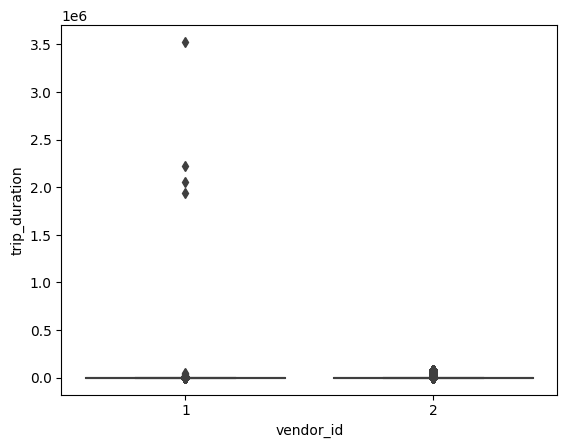

In [48]:
sns.boxplot(train_df, x = "vendor_id", y="trip_duration")

In [59]:
train_df[train_df.trip_duration > 100000]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
355003,1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736
680594,369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
924150,1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
978383,53347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282


Ну тут видно, что у вендора 1 есть 4 поездки с огромным временем пути, хотя перемещение довольно мало, если смотреть на координаты начала и конца, так что я выкину эти данные, т.к. такая ситуация крайне маловероятно -- выбросы

In [65]:
print(list(train_df[train_df.trip_duration > 100000].index))
train_df.drop(labels=list(train_df[train_df.trip_duration > 100000].index), inplace=True)

[355003, 680594, 924150, 978383]


Empty DataFrame
Columns: [id, vendor_id, pickup_datetime, dropoff_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, trip_duration]
Index: []


<Axes: xlabel='vendor_id', ylabel='trip_duration'>

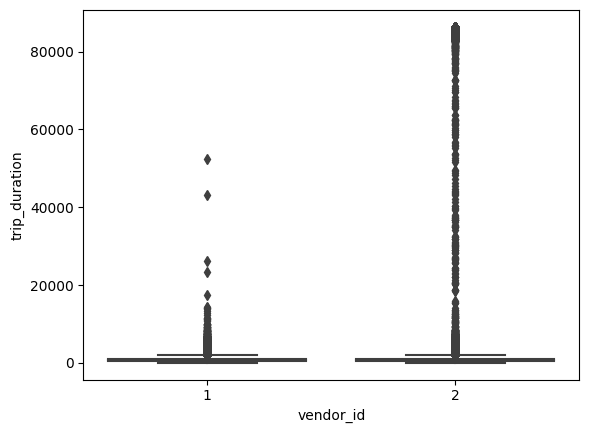

In [66]:
print(train_df[train_df.trip_duration > 100000])
sns.boxplot(train_df, x = "vendor_id", y="trip_duration")

In [71]:
groups = train_df.groupby("vendor_id")

Теперь мне интересно поглядеть на зависимость времени пути от расстояния между двумя точками 

In [74]:
def dist(p1, p2):
  x1,y1 = p1
  x2,y2 = p2

  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

train_df["distance"] = dist((train_df["pickup_longitude"], train_df["pickup_latitude"]), ((train_df["dropoff_longitude"], train_df["dropoff_latitude"])))

In [75]:
train_df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.017680
1,2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.020456
2,3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.059934
3,3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.013438
4,2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.010690


<Axes: xlabel='distance', ylabel='trip_duration'>

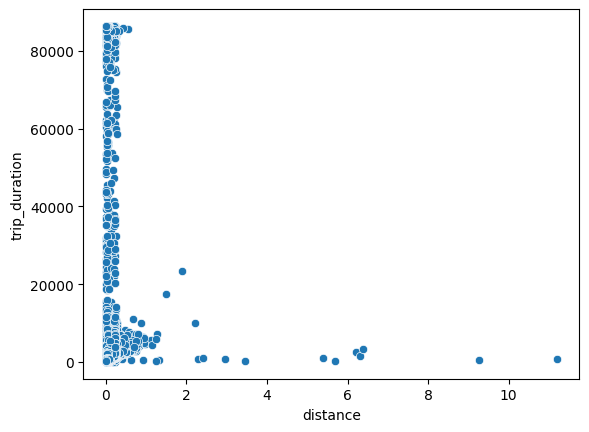

In [77]:
sns.scatterplot(train_df, x = "distance", y = "trip_duration")

In [82]:
dist_time_df = pd.concat([train_df["distance"], train_df["trip_duration"]], axis = 1)
dist_time_df.head(2)

,distance,trip_duration
0,0.017680,455
1,0.020456,663


In [84]:
dist_time_df.corr('pearson')

,distance,trip_duration
distance,1.000000,0.152755
trip_duration,0.152755,1.000000


Забавно, что хотя дистанция является довольно абстрактным числом, даже при такой оценке можно заметить, что время поездки почти не зависит от её длины